In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
from sklearn.svm import SVC

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
#Upload data from yahoo finance
data = yf.download('AAPL', start='2020-10-01', end='2022-10-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
#Create the independent variables
data['High-Low'] = data['High'] - data['Low']
data['Open-Close'] = data['Open'] - data['Close']

In [4]:
#Store the indepedent variables in a variable called 'X'
X = data[['High-Low', 'Open-Close', 'Close']]
X.head()

,High-Low,Open-Close,Close
Date,,,
2020-09-30,3.639999,-2.019997,115.809998
2020-10-01,1.889999,0.849998,116.790001
2020-10-02,3.150002,-0.129997,113.019997
2020-10-05,3.099998,-2.589996,116.500000
2020-10-06,3.870003,2.539993,113.160004


In [5]:
#Store the target variable into a variable called 'y'
#If tommorows close price is greater than todays close price then put 1 else put 0
y = np.where(data.Close.shift(-1) > data.Close, 1, 0)

In [6]:
#Get the percentage to split the data (90% train data set, and 10% test data set)
percentage_split = 0.9
row = int(data.shape[0] * percentage_split)

#Create the train data set
X_train = X[:row]
y_train = y[:row]

#Create the test data set
X_test = X[row:]
y_test = y[row:]

In [7]:
#Create the model
model = SVC()
#Train the model 
model.fit(X_train[['Open-Close', 'High-Low']], y_train)

SVC()

In [8]:
#Check the score of the model on the train data
model.score(X_train[['Open-Close', 'High-Low']], y_train)

0.5572687224669604

In [9]:
#Check the score of the model on the test data set 
model.score(X_test[['Open-Close', 'High-Low']], y_test)

0.43137254901960786

In [10]:
#Make and show the models predictions
data['Predictions'] = model.predict(X[['Open-Close', 'High-Low']])
data[['Predictions']].head()

,Predictions
Date,
2020-09-30,1
2020-10-01,1
2020-10-02,1
2020-10-05,1
2020-10-06,0


In [11]:
#Calculate the daily returns
data['Return'] = data['Close'].pct_change(1)
data[['Return']].head()

,Return
Date,
2020-09-30,NaN
2020-10-01,0.008462
2020-10-02,-0.032280
2020-10-05,0.030791
2020-10-06,-0.028669


In [12]:
#Calculate the strategy returns
data['Strat_return'] = data['Predictions'].shift(1) * data['Return']
data[['Strat_return']].head(5)

,Strat_return
Date,
2020-09-30,NaN
2020-10-01,0.008462
2020-10-02,-0.032280
2020-10-05,0.030791
2020-10-06,-0.028669


In [13]:
#Calculate the cumulitive returns
data['Cumul_Ret'] = data['Return'].cumsum()
#Calculation of the strategy cumultive returns
data['Cumul_Strategy'] = data['Strat_return'].cumsum()

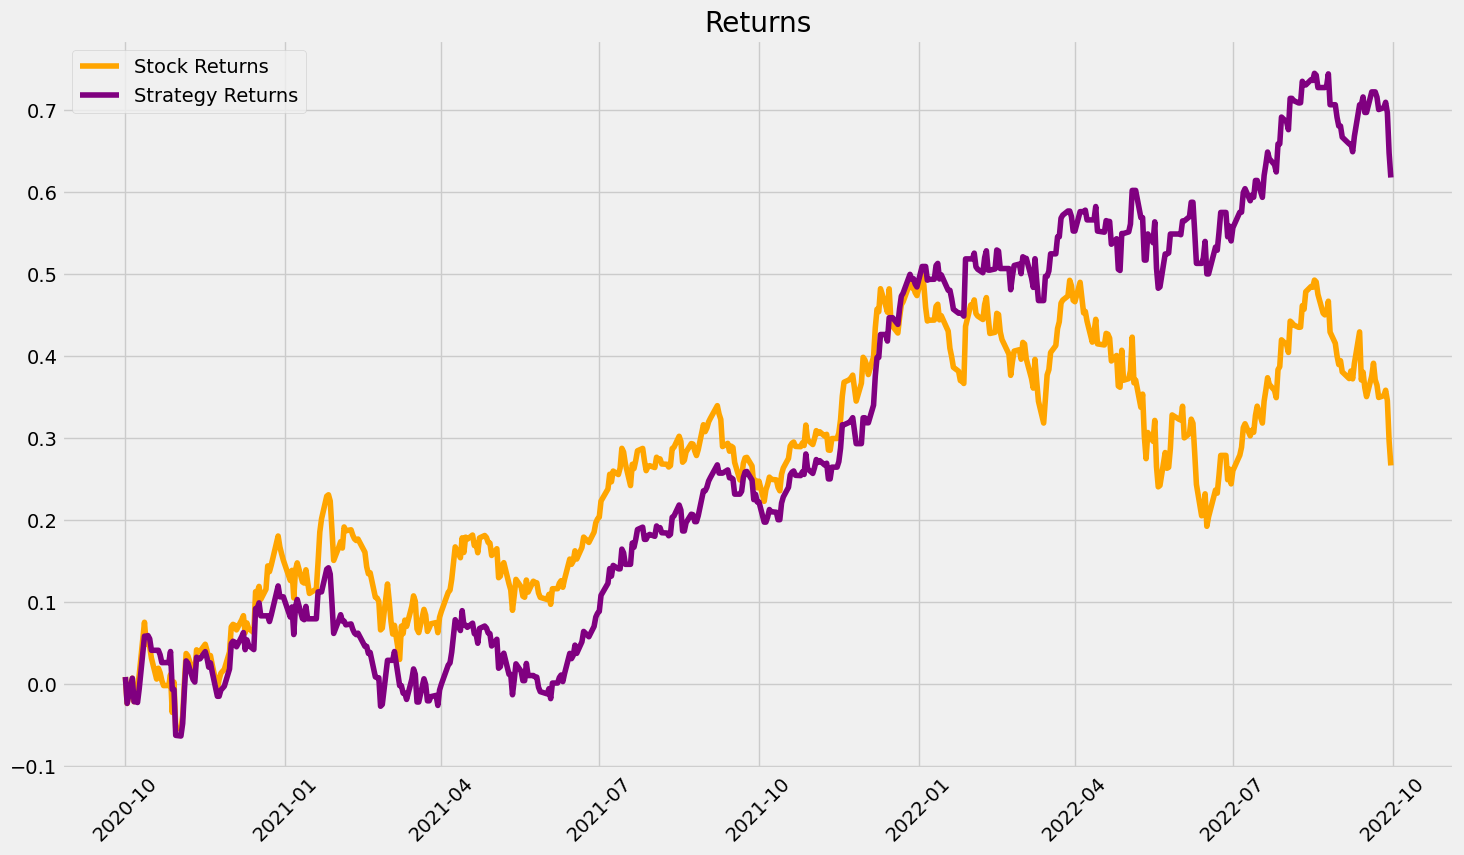

In [14]:
#Visualize and show the data
plt.figure(figsize=(16, 9))
plt.title('Returns')
plt.plot(data['Cumul_Ret'], color = 'orange', label = 'Stock Returns')
plt.plot(data['Cumul_Strategy'], color = 'purple', label = 'Strategy Returns')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [15]:
#Print returns
print(f'The stock gives a return of {data["Cumul_Ret"][-1] * 100}%')
print(f'The strategy gives a return of {data["Cumul_Strategy"][-1] * 100}%')  

The stock gives a return of 26.659629166835607%
The strategy gives a return of 61.7984513505113%


In [16]:
data.sample(10, random_state=42)

,Open,High,Low,Close,Adj Close,Volume,High-Low,Open-Close,Predictions,Return,Strat_return,Cumul_Ret,Cumul_Strategy
Date,,,,,,,,,,,,,
2021-06-09,127.209999,127.750000,126.519997,127.129997,125.657478,56877900,1.230003,0.080002,1,0.003077,0.003077,0.125986,0.010878
2021-11-01,148.990005,149.699997,147.800003,148.960007,147.455215,74588300,1.899994,0.029999,1,-0.005607,-0.005607,0.292170,0.256891
2022-09-12,159.589996,164.259995,159.300003,163.429993,162.685577,104956000,4.959991,-3.839996,0,0.038508,0.038508,0.429612,0.706759
2021-01-13,128.759995,131.449997,128.490005,130.889999,128.961807,88636800,2.959991,-2.130005,1,0.016227,0.016227,0.139293,0.094609
2021-12-15,175.110001,179.500000,172.309998,179.300003,177.747742,131063300,7.190002,-4.190002,0,0.028509,0.028509,0.482116,0.446901
2021-01-20,128.660004,132.490005,128.550003,132.029999,130.085037,104319500,3.940002,-3.369995,0,0.032856,0.032856,0.148718,0.112338
2022-08-22,169.690002,169.860001,167.139999,167.570007,166.806732,69026800,2.720001,2.119995,0,-0.023029,-0.000000,0.452390,0.727778
2021-04-22,133.039993,134.149994,131.410004,131.940002,130.190643,84566500,2.739990,1.099991,1,-0.011685,-0.011685,0.160101,0.049616
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.316086,68039400,2.770004,-2.279999,1,0.021426,0.000000,0.478619,0.730977
